# 8. 준-부문자열

세번째 동적계획법 코딩 문제였습니다. 개인적으로 정말 어렵게 느껴졌습니다. 코드도 이전 문제와 달리 깔끔하지 않고 억지로 푼 느낌입니다. 모범 답안이 나중에 올라오면 꼭 확인해보고 싶은 문제입니다.

## 문제

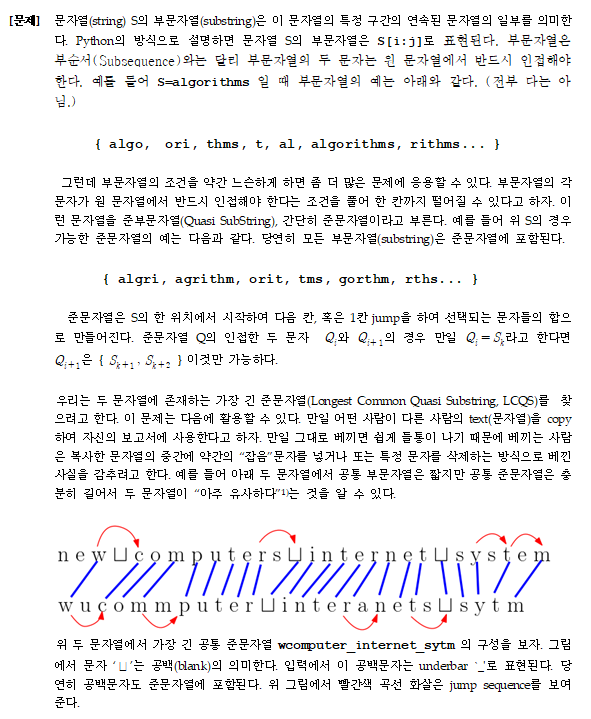

## 입출력

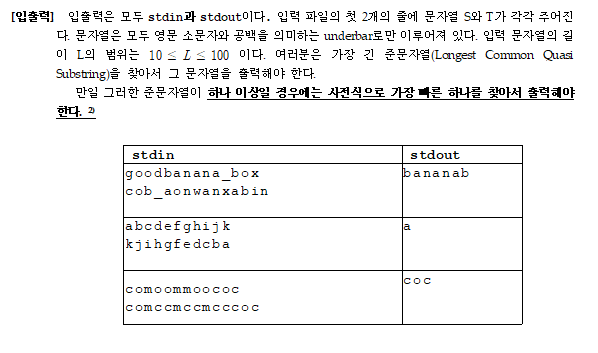

## 기본 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함

Mounted at /content/drive/


In [ ]:
# 수정
add = "_8_준-부문자열(동적계획법)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [ ]:
def test():
  for i in range(1, 6):
    class_ = algorithm()
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
    
    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[0], input[1])
    # print(f"input : {input[0]} / {input[1]}")
    result = class_.out()
    print(f"{result == answer}\n result: {result} answer: {answer}")


In [ ]:
import numpy as np

## 풀이

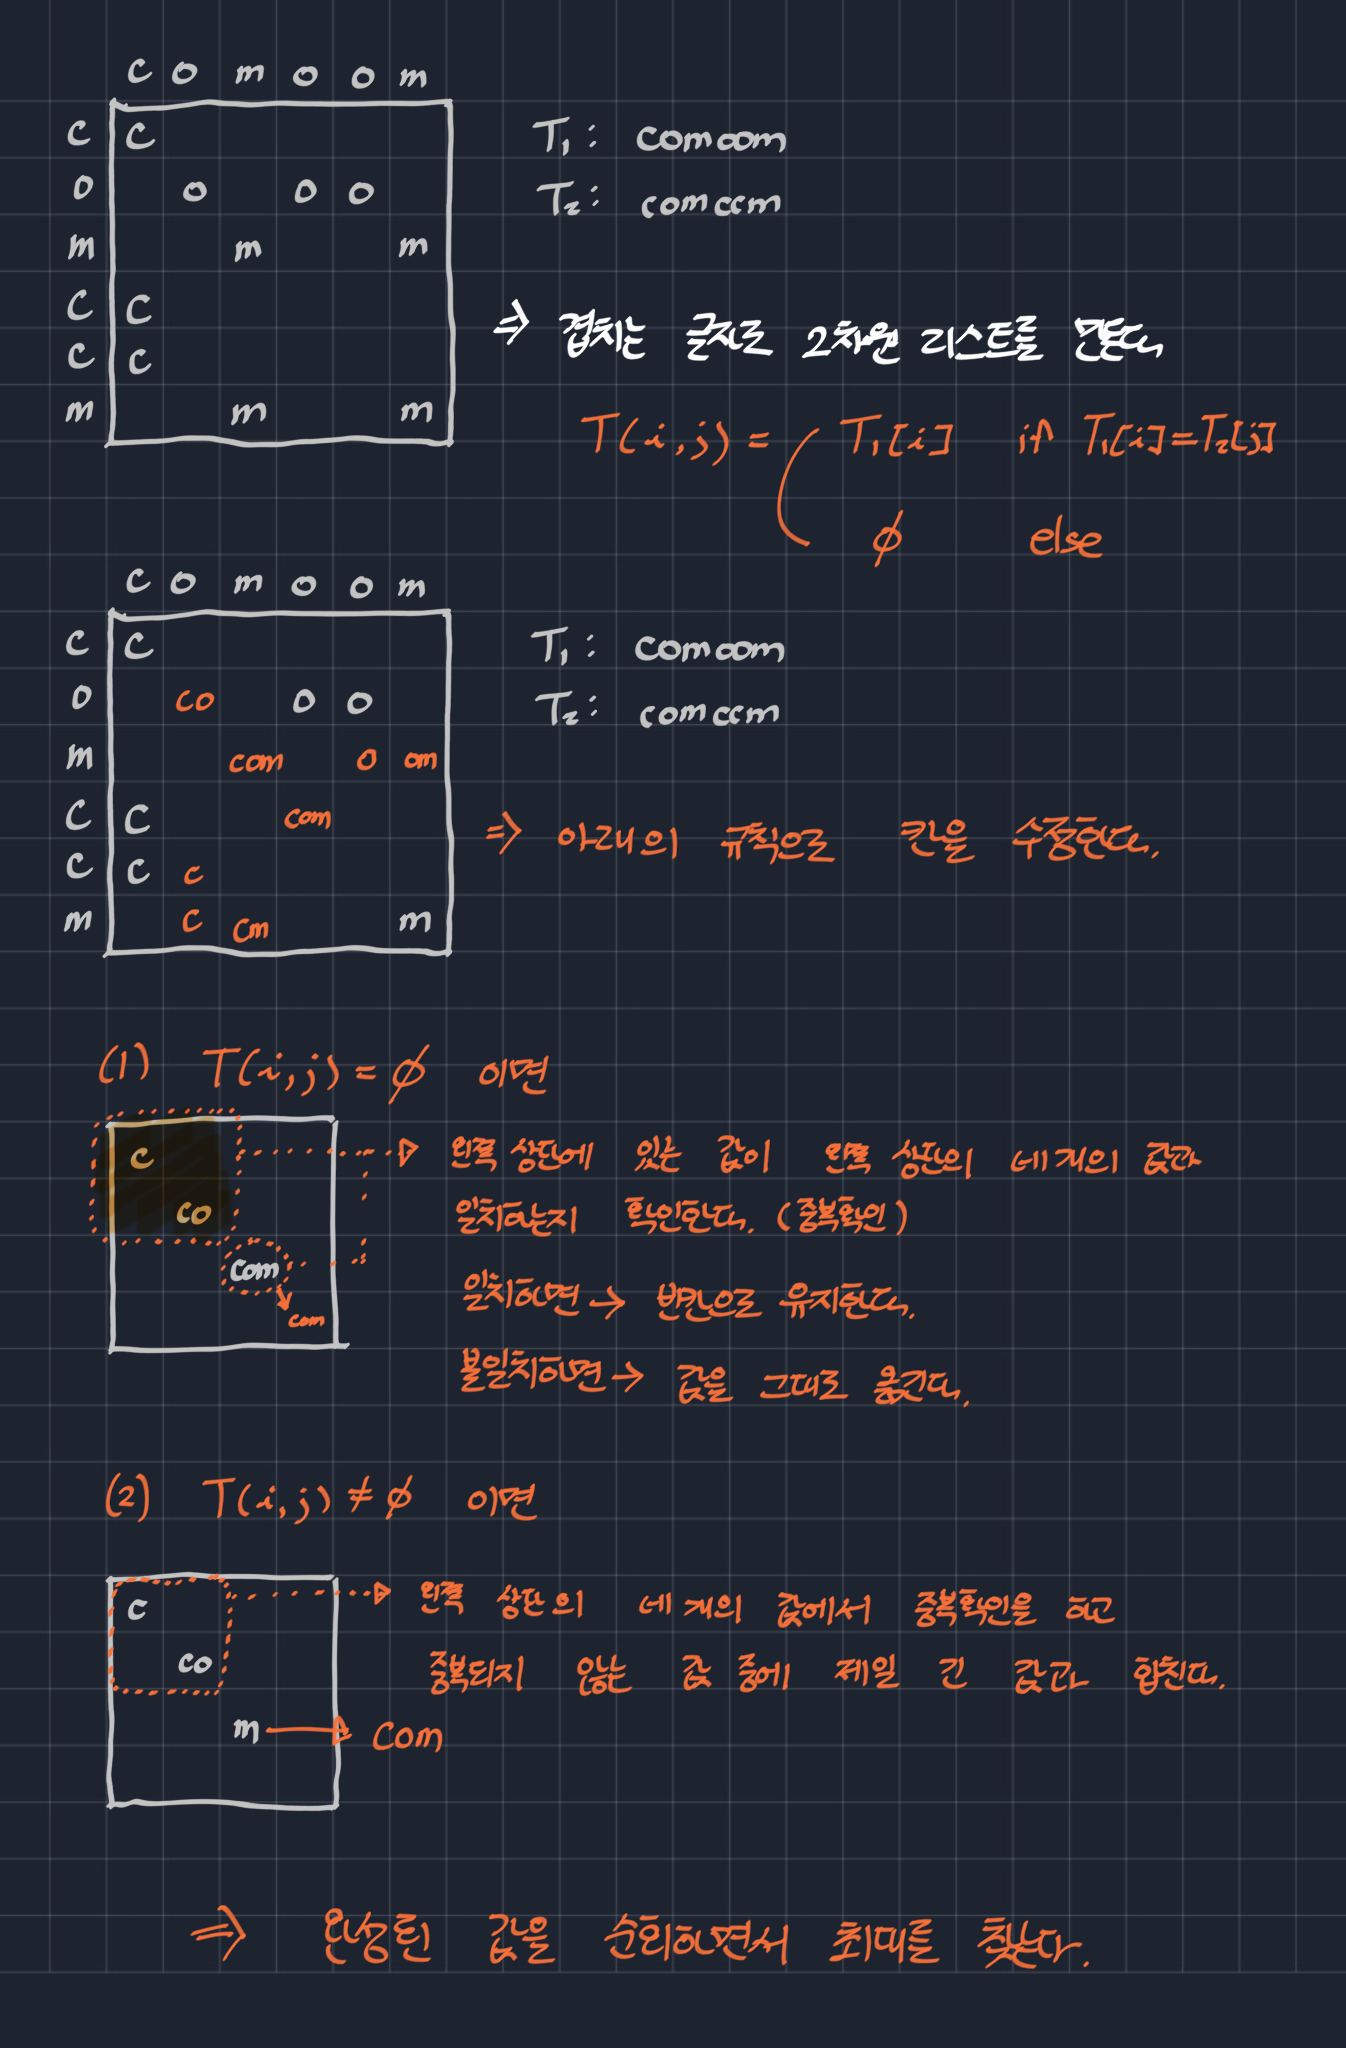

솔직히 이 문제를 깔끔하게 풀 방법이 떠오르지 않았습니다. 그래서 제한된 시간을 턱걸이로 통과하는 걸 목표로 했습니다.

In [ ]:
class algorithm:
  def input(self, text1, text2):
    self.text1 = text1.replace('\n', '')
    self.text2 = text2.replace('\n', '')
    # print(self.text1, self.text2)
    self.text1_length = len(text1)
    self.text2_length = len(text2)
    self.table = np.array(list(text1 * self.text2_length)).reshape(self.text2_length, self.text1_length)

    for i, char in enumerate(text2):
      self.table[i, :] = np.where(self.table[i,:] == char, char, '')

    self.table = self.table.tolist()

    self.change_table()
    # self.change_cell(2, 4)

  def change_cell(self, i, j):
    max = self.table[i][j]
    origin = max

    if i == 1: 
      start_i = 0
      end_i = 1
    else: 
      start_i = i - 2
      end_i = i

    if j == 1: 
      start_j = 0
      end_j = 1
    else: 
      start_j = j - 2
      end_j = j
    
    if origin == '':
      if not self.check(i-1, j-1):
        max = self.table[i-1][j-1]
    else: 
      for x in range(start_i, end_i):
        for y in range(start_j, end_j):
          cell = self.table[x][y]

          if self.check(x,y):
            continue
          else:
            if len(cell + origin) > len(max):
              max =  cell + origin
            elif len(cell + origin) == len(max) and cell + origin < max:
              max = cell + origin

      self.table[i][j] = max

    
  
  def change_table(self):
    for i in range(1, self.text2_length):
      for j in range(1, self.text1_length):
        self.change_cell(i,j)
  
  def check(self, i, j):
    origin = self.table[i][j]
    result = False

    if i == 0:
      return result

    if i == 1: 
      start_i = 0
      end_i = 1
    else: 
      start_i = i - 2
      end_i = i

    if j == 0:
      return result

    if j == 1: 
      start_j = 0
      end_j = 1
    else: 
      start_j = j - 2
      end_j = j

    for x in range(start_i, end_i):
      for y in range(start_j, end_j):
        cell = self.table[x][y]
        if cell == origin:
          result = True
          break
    
    return result

  def out(self):
    max = self.table[-1][-1]

    for i in range(self.text2_length):
      for j in range(self.text1_length):
        cell = self.table[i][j]
        if len(cell) > len(max):
            max =  cell
        elif len(cell) == len(max) and cell < max:
            max = cell

    return max


In [ ]:
al = algorithm()
al.input('abcdefghijk','kjihgfedcba')
al.table
al.out()

'a'

In [ ]:
al = algorithm()
al.input('comoom','comccm')
al.table

[['c', '', '', '', '', ''],
 ['', 'co', '', 'o', 'o', ''],
 ['', '', 'com', '', '', 'om'],
 ['c', '', '', '', '', ''],
 ['c', '', '', '', '', ''],
 ['', '', 'cm', '', '', 'm']]

In [ ]:
test()

[1]
False
 result: obananab answer: obananab

[2]
False
 result: a answer: a

[3]
False
 result: coc answer: coc

[4]
False
 result: wcomputer_internet_sytm answer: wcomputer_internet_sytm

[5]
False
 result: aa answer: aa



## 최종 제출 파일

In [ ]:
import numpy as np

class algorithm:
  def input(self, text1, text2):
    self.text1 = text1.replace('\n', '')
    self.text2 = text2.replace('\n', '')
    # print(self.text1, self.text2)
    self.text1_length = len(text1)
    self.text2_length = len(text2)
    self.table = np.array(list(text1 * self.text2_length)).reshape(self.text2_length, self.text1_length)

    for i, char in enumerate(text2):
      self.table[i, :] = np.where(self.table[i,:] == char, char, '')

    self.table = self.table.tolist()

    self.change_table()
    # self.change_cell(2, 4)

  def change_cell(self, i, j):
    max = self.table[i][j]
    origin = max

    if i == 1: 
      start_i = 0
      end_i = 1
    else: 
      start_i = i - 2
      end_i = i

    if j == 1: 
      start_j = 0
      end_j = 1
    else: 
      start_j = j - 2
      end_j = j
    
    if origin == '':
      if not self.check(i-1, j-1):
        max = self.table[i-1][j-1]
    else: 
      for x in range(start_i, end_i):
        for y in range(start_j, end_j):
          cell = self.table[x][y]

          if self.check(x,y):
            continue
          else:
            if len(cell + origin) > len(max):
              max =  cell + origin
            elif len(cell + origin) == len(max) and cell + origin < max:
              max = cell + origin

      self.table[i][j] = max

    
  
  def change_table(self):
    for i in range(1, self.text2_length):
      for j in range(1, self.text1_length):
        self.change_cell(i,j)
  
  def check(self, i, j):
    origin = self.table[i][j]
    result = False

    if i == 0:
      return result

    if i == 1: 
      start_i = 0
      end_i = 1
    else: 
      start_i = i - 2
      end_i = i

    if j == 0:
      return result

    if j == 1: 
      start_j = 0
      end_j = 1
    else: 
      start_j = j - 2
      end_j = j

    for x in range(start_i, end_i):
      for y in range(start_j, end_j):
        cell = self.table[x][y]
        if cell == origin:
          result = True
          break
    
    return result

  def out(self):
    max = self.table[-1][-1]

    for i in range(self.text2_length):
      for j in range(self.text1_length):
        cell = self.table[i][j]
        if len(cell) > len(max):
            max =  cell
        elif len(cell) == len(max) and cell < max:
            max = cell

    return max

al = algorithm()
text1 = input()
text2 = input()
al.input(text1, text2)
print(al.out())

## 결과

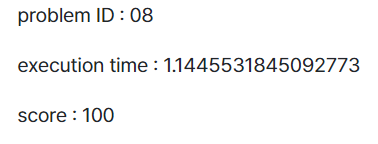